In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from pandas import Series, DataFrame
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
df = pd.read_excel("data_akbilgic.xlsx")

col = ["date","TL_BASED_ISE","USD_BASED_ISE",
           "IMKB_X_SP","IMKB_X_DAX","IMKB_X_FTSE",
           "IMKB_X_NIKKEI","IMKB_X_BOVESPA",
           "IMKB_X_MSCE_EU","IMKB_X_MSCI_EM"]

In [3]:
df.columns=col
df=df.drop(index=0)

In [4]:
df

,date,TL_BASED_ISE,USD_BASED_ISE,IMKB_X_SP,IMKB_X_DAX,IMKB_X_FTSE,IMKB_X_NIKKEI,IMKB_X_BOVESPA,IMKB_X_MSCE_EU,IMKB_X_MSCI_EM
1,2009-01-05 00:00:00,0.0357537,0.0383762,-0.00467931,0.00219342,0.00389438,0,0.0311902,0.012698,0.0285245
2,2009-01-06 00:00:00,0.0254259,0.0318127,0.00778674,0.00845534,0.0128656,0.00416245,0.0189196,0.0113407,0.00877264
3,2009-01-07 00:00:00,-0.0288617,-0.026353,-0.0304691,-0.0178331,-0.0287346,0.0172929,-0.0358986,-0.0170728,-0.0200154
4,2009-01-08 00:00:00,-0.0622081,-0.0847159,0.00339136,-0.0117263,-0.000465999,-0.0400613,0.0282832,-0.00556096,-0.0194238
5,2009-01-09 00:00:00,0.00985991,0.00965811,-0.0215332,-0.0198728,-0.0127097,-0.0044735,-0.00976388,-0.0109886,-0.00780221
...,...,...,...,...,...,...,...,...,...,...
532,2011-02-16 00:00:00,0.00859906,0.0133999,0.00623799,0.00192516,0.00795226,0.00571749,0.0183708,0.00697461,0.00303899
533,2011-02-17 00:00:00,0.00931031,0.0159772,0.00307089,-0.00118625,0.000345034,0.00261955,0.00168569,-0.000580515,0.00103859
534,2011-02-18 00:00:00,0.000190969,-0.0016526,0.00192291,0.00287211,-0.000723066,0.00056828,0.00562792,0.000571574,0.00693787
535,2011-02-21 00:00:00,-0.013069,-0.013706,-0.0207422,-0.0142389,-0.0112749,0.00135758,-0.0119417,-0.0126153,-0.000957736


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 1 to 536
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            536 non-null    object
 1   TL_BASED_ISE    536 non-null    object
 2   USD_BASED_ISE   536 non-null    object
 3   IMKB_X_SP       536 non-null    object
 4   IMKB_X_DAX      536 non-null    object
 5   IMKB_X_FTSE     536 non-null    object
 6   IMKB_X_NIKKEI   536 non-null    object
 7   IMKB_X_BOVESPA  536 non-null    object
 8   IMKB_X_MSCE_EU  536 non-null    object
 9   IMKB_X_MSCI_EM  536 non-null    object
dtypes: object(10)
memory usage: 46.1+ KB


In [6]:
exchange = df.drop("date", axis=1)

In [7]:
exchange

,TL_BASED_ISE,USD_BASED_ISE,IMKB_X_SP,IMKB_X_DAX,IMKB_X_FTSE,IMKB_X_NIKKEI,IMKB_X_BOVESPA,IMKB_X_MSCE_EU,IMKB_X_MSCI_EM
1,0.0357537,0.0383762,-0.00467931,0.00219342,0.00389438,0,0.0311902,0.012698,0.0285245
2,0.0254259,0.0318127,0.00778674,0.00845534,0.0128656,0.00416245,0.0189196,0.0113407,0.00877264
3,-0.0288617,-0.026353,-0.0304691,-0.0178331,-0.0287346,0.0172929,-0.0358986,-0.0170728,-0.0200154
4,-0.0622081,-0.0847159,0.00339136,-0.0117263,-0.000465999,-0.0400613,0.0282832,-0.00556096,-0.0194238
5,0.00985991,0.00965811,-0.0215332,-0.0198728,-0.0127097,-0.0044735,-0.00976388,-0.0109886,-0.00780221
...,...,...,...,...,...,...,...,...,...
532,0.00859906,0.0133999,0.00623799,0.00192516,0.00795226,0.00571749,0.0183708,0.00697461,0.00303899
533,0.00931031,0.0159772,0.00307089,-0.00118625,0.000345034,0.00261955,0.00168569,-0.000580515,0.00103859
534,0.000190969,-0.0016526,0.00192291,0.00287211,-0.000723066,0.00056828,0.00562792,0.000571574,0.00693787
535,-0.013069,-0.013706,-0.0207422,-0.0142389,-0.0112749,0.00135758,-0.0119417,-0.0126153,-0.000957736


In [8]:
exchange=exchange.astype(float)

In [9]:
exchange.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536 entries, 1 to 536
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TL_BASED_ISE    536 non-null    float64
 1   USD_BASED_ISE   536 non-null    float64
 2   IMKB_X_SP       536 non-null    float64
 3   IMKB_X_DAX      536 non-null    float64
 4   IMKB_X_FTSE     536 non-null    float64
 5   IMKB_X_NIKKEI   536 non-null    float64
 6   IMKB_X_BOVESPA  536 non-null    float64
 7   IMKB_X_MSCE_EU  536 non-null    float64
 8   IMKB_X_MSCI_EM  536 non-null    float64
dtypes: float64(9)
memory usage: 41.9 KB


In [10]:
exchange["date"]=pd.to_datetime(df["date"])

In [11]:
exchange.set_index("date", inplace=True)

In [12]:
exchange.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 536 entries, 2009-01-05 to 2011-02-22
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TL_BASED_ISE    536 non-null    float64
 1   USD_BASED_ISE   536 non-null    float64
 2   IMKB_X_SP       536 non-null    float64
 3   IMKB_X_DAX      536 non-null    float64
 4   IMKB_X_FTSE     536 non-null    float64
 5   IMKB_X_NIKKEI   536 non-null    float64
 6   IMKB_X_BOVESPA  536 non-null    float64
 7   IMKB_X_MSCE_EU  536 non-null    float64
 8   IMKB_X_MSCI_EM  536 non-null    float64
dtypes: float64(9)
memory usage: 41.9 KB


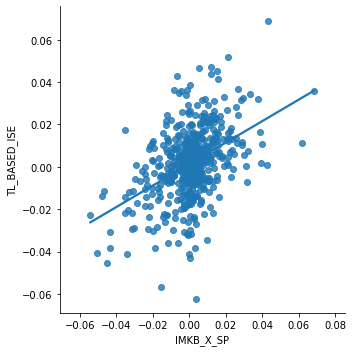

In [13]:
sns.lmplot(x="IMKB_X_SP", y="TL_BASED_ISE", fit_reg=True, ci=None, data=exchange)

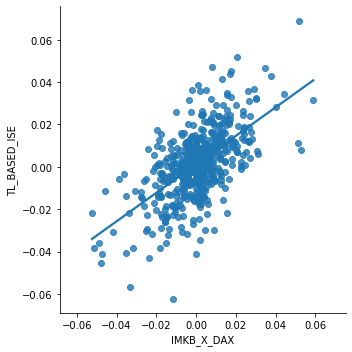

In [14]:
sns.lmplot(x="IMKB_X_DAX", y="TL_BASED_ISE", fit_reg=True, ci=None, data=exchange)

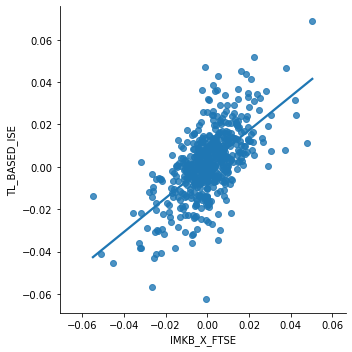

In [15]:
sns.lmplot(x="IMKB_X_FTSE", y="TL_BASED_ISE", fit_reg=True, ci=None, data=exchange)

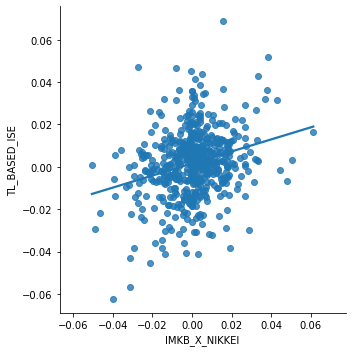

In [16]:
sns.lmplot(x="IMKB_X_NIKKEI", y="TL_BASED_ISE", fit_reg=True, ci=None, data=exchange)

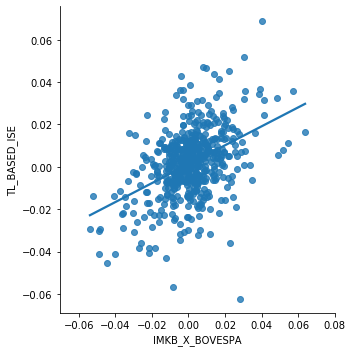

In [17]:
sns.lmplot(x="IMKB_X_BOVESPA", y="TL_BASED_ISE", fit_reg=True, ci=None, data=exchange)

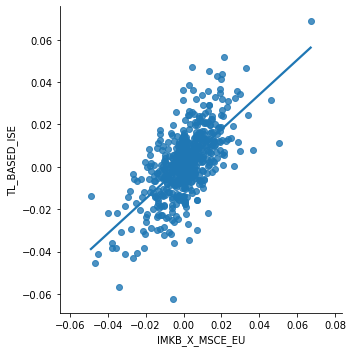

In [18]:
sns.lmplot(x="IMKB_X_MSCE_EU", y="TL_BASED_ISE", fit_reg=True, ci=None, data=exchange)

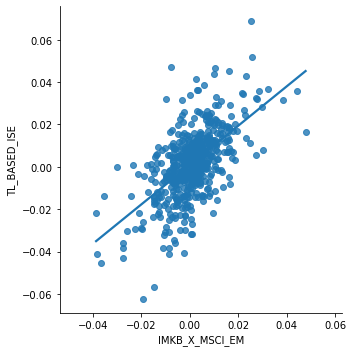

In [19]:
sns.lmplot(x="IMKB_X_MSCI_EM", y="TL_BASED_ISE", fit_reg=True, ci=None, data=exchange)

In [20]:
exchange.shape

(536, 9)

In [21]:
exchange.corr()

,TL_BASED_ISE,USD_BASED_ISE,IMKB_X_SP,IMKB_X_DAX,IMKB_X_FTSE,IMKB_X_NIKKEI,IMKB_X_BOVESPA,IMKB_X_MSCE_EU,IMKB_X_MSCI_EM
TL_BASED_ISE,1.000000,0.942897,0.439489,0.602081,0.622948,0.260052,0.432898,0.655519,0.600295
USD_BASED_ISE,0.942897,1.000000,0.449561,0.629218,0.648740,0.393225,0.446889,0.690761,0.701954
IMKB_X_SP,0.439489,0.449561,1.000000,0.685843,0.657673,0.131250,0.722069,0.687550,0.528243
IMKB_X_DAX,0.602081,0.629218,0.685843,1.000000,0.867369,0.258538,0.585791,0.936393,0.665162
IMKB_X_FTSE,0.622948,0.648740,0.657673,0.867369,1.000000,0.255236,0.596287,0.948963,0.687543
IMKB_X_NIKKEI,0.260052,0.393225,0.131250,0.258538,0.255236,1.000000,0.172752,0.283750,0.547288
IMKB_X_BOVESPA,0.432898,0.446889,0.722069,0.585791,0.596287,0.172752,1.000000,0.621704,0.688074
IMKB_X_MSCE_EU,0.655519,0.690761,0.687550,0.936393,0.948963,0.283750,0.621704,1.000000,0.716502
IMKB_X_MSCI_EM,0.600295,0.701954,0.528243,0.665162,0.687543,0.547288,0.688074,0.716502,1.000000


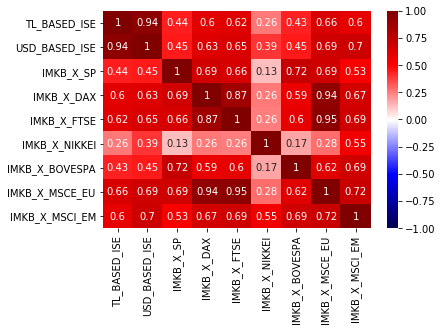

In [22]:
sns.heatmap(exchange.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

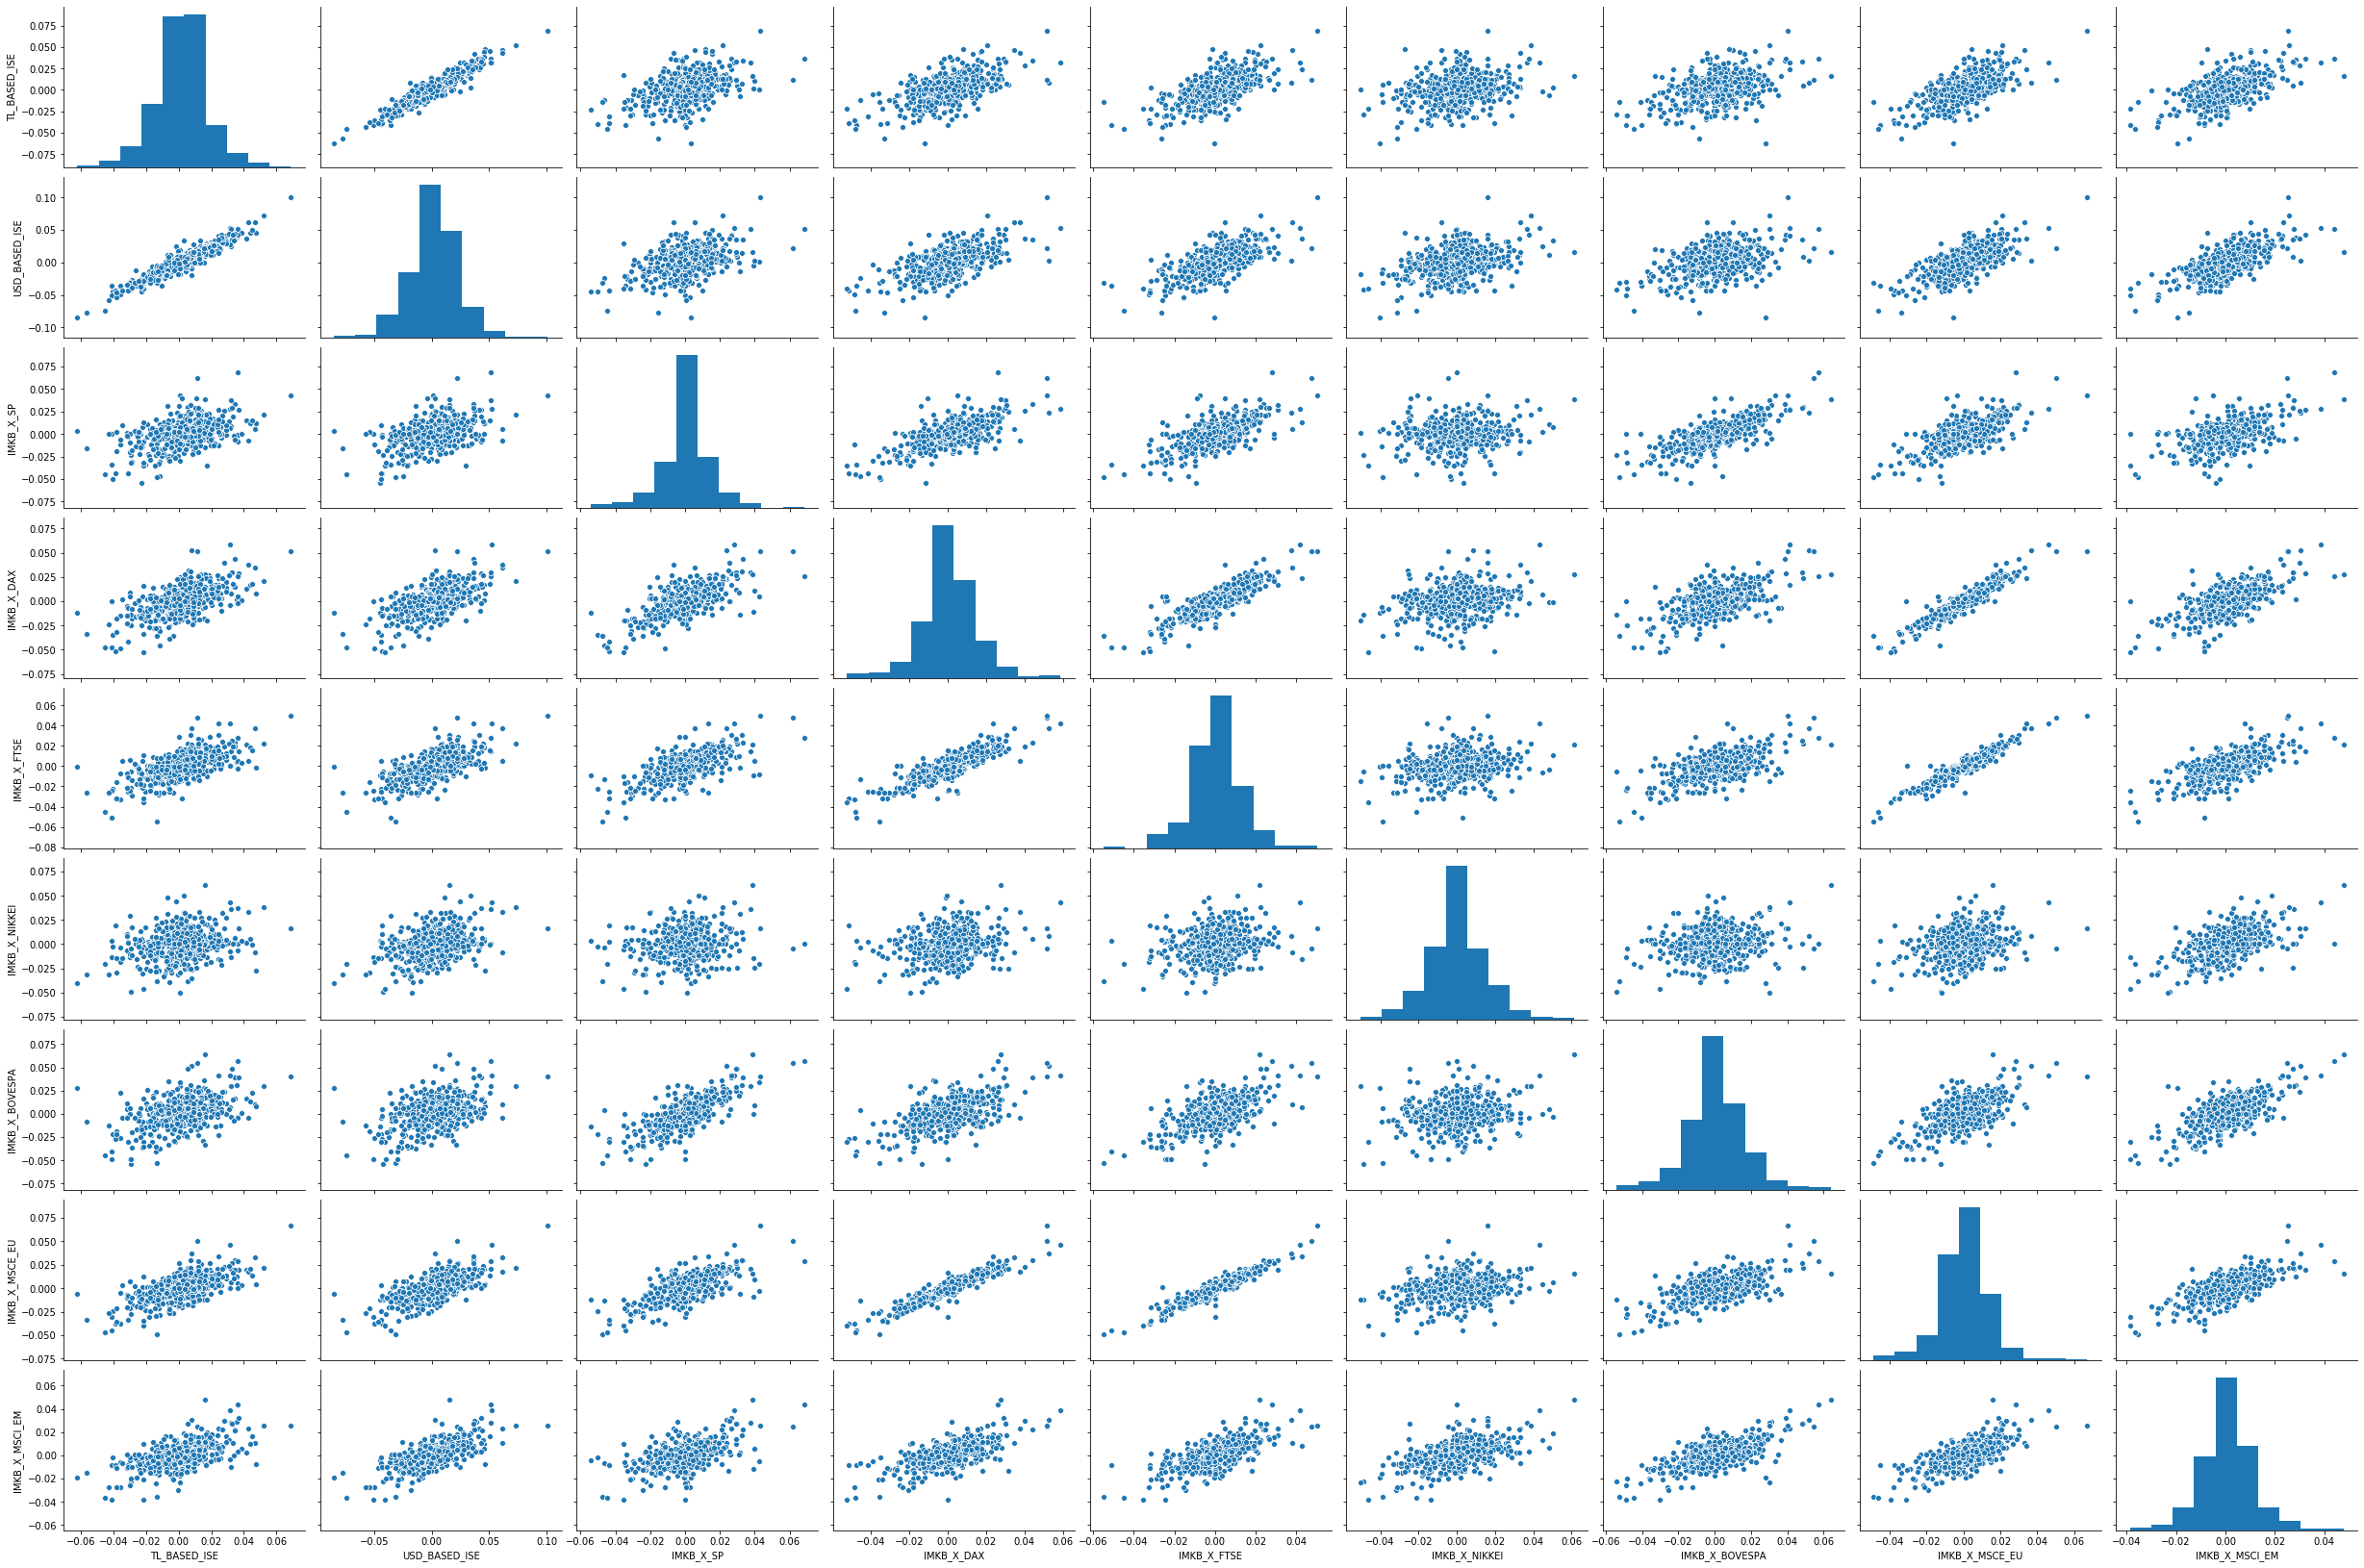

In [23]:
sns.pairplot(exchange, aspect=1.5)

In [24]:
X = exchange.loc[:,["IMKB_X_SP","IMKB_X_DAX"]]

In [25]:
y = exchange[["TL_BASED_ISE"]]

In [26]:
modelOls =sm.OLS(y,X, data=exchange)

In [27]:
result = modelOls.fit()

In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           TL_BASED_ISE   R-squared (uncentered):                   0.365
Model:                            OLS   Adj. R-squared (uncentered):              0.363
Method:                 Least Squares   F-statistic:                              153.7
Date:                Thu, 02 Apr 2020   Prob (F-statistic):                    1.89e-53
Time:                        12:11:50   Log-Likelihood:                          1566.8
No. Observations:                 536   AIC:                                     -3130.
Df Residuals:                     534   BIC:                                     -3121.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
IMKB_X_SP      0.0596      0.055      1.086      0.278      -0.048       0.168
IMKB_X_DAX     0.6369      0.053     11.978      0.000       0.532       0.741
==============================================================================
Omnibus:                       13.189   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.311
Skew:                          -0.115   Prob(JB):                     8.67e-06
Kurtosis:                       3.996   Cond. No.                         2.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
y, X = patsy.dmatrices("""TL_BASED_ISE~IMKB_X_SP+IMKB_X_DAX+
                          IMKB_X_FTSE""", data=exchange, return_type="dataframe")

In [30]:
modelOls2 = sm.OLS(y,X)
result2 = modelOls2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TL_BASED_ISE   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     119.9
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           2.45e-59
Time:                        12:11:51   Log-Likelihood:                 1586.1
No. Observations:                 536   AIC:                            -3164.
Df Residuals:                     532   BIC:                            -3147.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0012      0.001      2.131      0.034    9.06e-05       0.002
IMKB_X_SP       0.0023      0.054      0.042      0.966      -0.104       0.108
IMKB_X_DAX      0.2776      0.079      3.513      0.000       0.122       0.433
IMKB_X_FTSE     0.5220      0.088      5.945      0.000       0.350       0.694
==============================================================================
Omnibus:                       17.866   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.397
Skew:                          -0.140   Prob(JB):                     1.25e-08
Kurtosis:                       4.246   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
modelOls3 = smf.ols("""TL_BASED_ISE~IMKB_X_SP+IMKB_X_DAX+
                       IMKB_X_FTSE+IMKB_X_NIKKEI""", data = exchange)

In [32]:
result3 = modelOls3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TL_BASED_ISE   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     93.25
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           4.94e-60
Time:                        12:11:51   Log-Likelihood:                 1590.2
No. Observations:                 536   AIC:                            -3170.
Df Residuals:                     531   BIC:                            -3149.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0011      0.001      2.117      0.035    8.24e-05       0.002
IMKB_X_SP         0.0143      0.054      0.267      0.790      -0.091       0.120
IMKB_X_DAX        0.2554      0.079      3.239      0.001       0.101       0.410
IMKB_X_FTSE       0.5026      0.087      5.746      0.000       0.331       0.674
IMKB_X_NIKKEI     0.1090      0.038      2.875      0.004       0.035       0.183
==============================================================================
Omnibus:                       12.600   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               23.401
Skew:                          -0.051   Prob(JB):                     8.29e-06
Kurtosis:                       4.019   Cond. No.                         204.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
modelOls4 = smf.ols("""TL_BASED_ISE~IMKB_X_SP+
                       IMKB_X_DAX+IMKB_X_FTSE+
                       IMKB_X_NIKKEI+IMKB_X_BOVESPA""", data=exchange)

In [34]:
result4 = modelOls4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TL_BASED_ISE   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     75.53
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           1.07e-59
Time:                        12:11:52   Log-Likelihood:                 1591.8
No. Observations:                 536   AIC:                            -3172.
Df Residuals:                     530   BIC:                            -3146.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0011      0.001      2.057      0.040    4.99e-05       0.002
IMKB_X_SP         -0.0450      0.063     -0.712      0.477      -0.169       0.079
IMKB_X_DAX         0.2557      0.079      3.249      0.001       0.101       0.410
IMKB_X_FTSE        0.4797      0.088      5.437      0.000       0.306       0.653
IMKB_X_NIKKEI      0.1046      0.038      2.761      0.006       0.030       0.179
IMKB_X_BOVESPA     0.0908      0.051      1.778      0.076      -0.010       0.191
==============================================================================
Omnibus:                       16.015   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.406
Skew:                          -0.097   Prob(JB):                     9.18e-08
Kurtosis:                       4.189   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
modelOls5 = smf.ols("""TL_BASED_ISE~IMKB_X_SP+IMKB_X_DAX+
                       IMKB_X_FTSE+IMKB_X_NIKKEI+
                       IMKB_X_BOVESPA+IMKB_X_MSCE_EU""", data=exchange)

In [36]:
result5 = modelOls5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TL_BASED_ISE   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     68.82
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           3.68e-63
Time:                        12:11:52   Log-Likelihood:                 1602.2
No. Observations:                 536   AIC:                            -3190.
Df Residuals:                     529   BIC:                            -3160.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0012      0.001      2.308      0.021       0.000       0.002
IMKB_X_SP         -0.0461      0.062     -0.744      0.457      -0.168       0.076
IMKB_X_DAX        -0.0880      0.108     -0.818      0.414      -0.300       0.124
IMKB_X_FTSE        0.0015      0.136      0.011      0.991      -0.265       0.268
IMKB_X_NIKKEI      0.0848      0.037      2.263      0.024       0.011       0.158
IMKB_X_BOVESPA     0.0634      0.050      1.257      0.209      -0.036       0.163
IMKB_X_MSCE_EU     0.8708      0.190      4.581      0.000       0.497       1.244
==============================================================================
Omnibus:                       16.935   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.557
Skew:                          -0.136   Prob(JB):                     5.17e-08
Kurtosis:                       4.195   Cond. No.                         437.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
modelOls6 = smf.ols("""TL_BASED_ISE~IMKB_X_SP+IMKB_X_DAX+
                       IMKB_X_FTSE+IMKB_X_NIKKEI+
                       IMKB_X_BOVESPA+IMKB_X_MSCE_EU+
                       IMKB_X_MSCI_EM""", data=exchange)

In [38]:
result6 = modelOls6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TL_BASED_ISE   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     67.07
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           6.15e-69
Time:                        12:11:52   Log-Likelihood:                 1618.1
No. Observations:                 536   AIC:                            -3220.
Df Residuals:                     528   BIC:                            -3186.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0010      0.001      1.871      0.062   -4.86e-05       0.002
IMKB_X_SP          0.0179      0.061      0.293      0.770      -0.102       0.138
IMKB_X_DAX        -0.1013      0.105     -0.968      0.334      -0.307       0.104
IMKB_X_FTSE       -0.0509      0.132     -0.385      0.700      -0.310       0.209
IMKB_X_NIKKEI     -0.0595      0.044     -1.341      0.181      -0.147       0.028
IMKB_X_BOVESPA    -0.1109      0.058     -1.917      0.056      -0.225       0.003
IMKB_X_MSCE_EU     0.7417      0.186      3.985      0.000       0.376       1.107
IMKB_X_MSCI_EM     0.5557      0.098      5.677      0.000       0.363       0.748
==============================================================================
Omnibus:                       12.884   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               24.462
Skew:                          -0.033   Prob(JB):                     4.88e-06
Kurtosis:                       4.045   Cond. No.                         438.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X = exchange.loc[:, ["IMKB_X_SP","IMKB_X_DAX","IMKB_X_FTSE",
                     "IMKB_X_NIKKEI","IMKB_X_BOVESPA",
                     "IMKB_X_MSCE_EU","IMKB_X_MSCI_EM"]]

In [40]:
y = exchange["TL_BASED_ISE"]

In [41]:
linearReg = LinearRegression()

In [42]:
linearReg.fit(X,y)
linearReg.score(X,y)

0.4706744164289226

In [43]:
linearReg.coef_

array([ 0.01794698, -0.10129619, -0.0508566 , -0.05952028, -0.11090483,
        0.74172463,  0.55568052])

In [44]:
linearReg2 = LinearRegression()

In [45]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=.2, random_state=10)

In [46]:
linearReg2.fit(x_train,y_train)
prediction = linearReg2.predict(x_cv)
mse = np.mean((prediction-y_cv)**2)
mse

0.0001250383492045122

In [47]:
linearReg2.score(x_cv,y_cv)

0.5834913528694636

In [48]:
linearReg2.coef_

array([ 0.03671825, -0.1078379 , -0.06987677, -0.04793306, -0.12145733,
        0.67604223,  0.58889071])

In [49]:
ridge = Ridge(alpha=0.05, normalize=True)
ridge.fit(x_train, y_train)
prediction2 = ridge.predict(x_cv)
mse = np.mean((prediction2-y_cv)**2)
mse

0.00012742531205587053

In [50]:
ridge.score(x_cv,y_cv)

0.5755402668682882

In [51]:
ridge = Ridge(alpha=0.005, normalize=True)
ridge.fit(x_train, y_train)
prediction2 = ridge.predict(x_cv)
mse = np.mean((prediction2-y_cv)**2)
mse

0.0001253121318537223

In [52]:
ridge.score(x_cv,y_cv)

0.5825793699333826

In [53]:
ridge = Ridge(alpha=0.5, normalize=True)
ridge.fit(x_train, y_train)
prediction2 = ridge.predict(x_cv)
mse = np.mean((prediction2-y_cv)**2)
mse

0.00013913978255116602

In [54]:
ridge.score(x_cv,y_cv)

0.5365188123394402

In [55]:
X = exchange.loc[:, ["IMKB_X_SP","IMKB_X_DAX","IMKB_X_FTSE",
                     "IMKB_X_NIKKEI","IMKB_X_BOVESPA",
                     "IMKB_X_MSCE_EU","IMKB_X_MSCI_EM"]]

y = exchange["TL_BASED_ISE"]

In [56]:
X, X_test, y, y_test = train_test_split(X,y, test_size=.2, random_state=10)

X,y=np.array(X), np.array(y)
X

array([[-0.0027484 , -0.00064338, -0.00368789, ..., -0.00415202,
        -0.00347317, -0.00235416],
       [ 0.00232764,  0.0109748 ,  0.01436205, ...,  0.00816258,
         0.01026227,  0.00828374],
       [-0.03543936, -0.05233118, -0.03550453, ..., -0.03038024,
        -0.03957543, -0.03856446],
       ...,
       [ 0.00074922,  0.00264372, -0.00535111, ...,  0.00559025,
        -0.00374242, -0.01475963],
       [-0.02957765, -0.03885596, -0.0248176 , ..., -0.0101201 ,
        -0.0261489 , -0.00483702],
       [ 0.00458754, -0.01129203, -0.00808464, ..., -0.01056604,
        -0.00766744, -0.00414363]])

In [57]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)
cv_lm_r2s, cv_lm_reg_r2s = [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)
    
    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print("Simple regression scores: ", cv_lm_r2s)
print("Ridge scores: ", cv_lm_reg_r2s, "\n")

print(f"Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}")
print(f"Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}")  
    
    

Simple regression scores:  [0.31255675496331486, 0.43222441056049055, 0.4681743673740113, 0.3300116587120737, 0.35022463350006056]
Ridge scores:  [0.31235599246424706, 0.43241227313786057, 0.4681896192367979, 0.33018608613916334, 0.3508483450470643] 

Simple mean cv r^2: 0.379 +- 0.061
Ridge mean cv r^2: 0.379 +- 0.061


In [58]:
lm = LinearRegression()

cross_val_score(lm, X,y, cv=5, scoring="r2")

array([0.41624436, 0.49072586, 0.49450705, 0.22510638, 0.36407426])

In [59]:
kf = KFold(n_splits=5, shuffle=True, random_state = 20)
cross_val_score(lm, X, y, cv=kf, scoring="r2")

array([0.58237643, 0.30426678, 0.39314567, 0.4578653 , 0.27684386])

In [60]:
kf = KFold(n_splits=5, shuffle=True, random_state=20)

print(np.mean(cross_val_score(lm, X,y, cv=kf, scoring="r2")))
print(np.mean(cross_val_score(lm_reg, X,y, cv=kf, scoring="r2")))

0.40289961100049165
0.14785721036078264
